# Resources

1. [Imputation paper survey](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/pdf/kjae-64-402.pdf)
2. [link](https://www.countants.com/blogs/heres-how-you-can-configure-automatic-imputation-of-missing-data/)

# Objectives:

1. Data problems: missing data and imbalanced algorithms.
2. How to deal with each problem.
3. Python packages.


# General tip:

When you work with data problem algorithms, split data into development, validation, and testing. Run each alogrithm on the development part and test it on the validation one. The best model from the validation part should be tested (its performance test) using test data.

# [Missing Data][1]

Missing data is a common and exciting problem in statistical analysis and machine learning. Missing data is a common and exciting problem in statistical analysis and machine learning. <br/>

## [Missing Data Mechanisms:][2]

1. Missing Completely at Random (MCAR):  This means that the nature of the missing data is not related to any of the variables, whether missing or observed. <b> Example: You forgot to write your job in the job entry your application. </b> <br/> <br/>

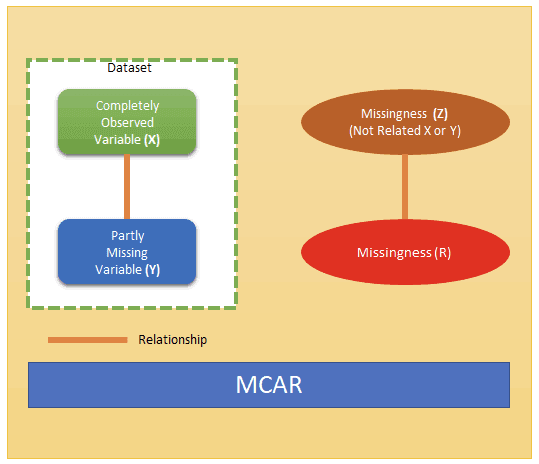

2. Missing at Random (MAR): This means that the nature of the missing data is related to the observed data but not the missing data. <b> Example: You don't have a job to write your job in the job entry your application -- It could be predicted easily by other featuures. </b> <br/> <br/>

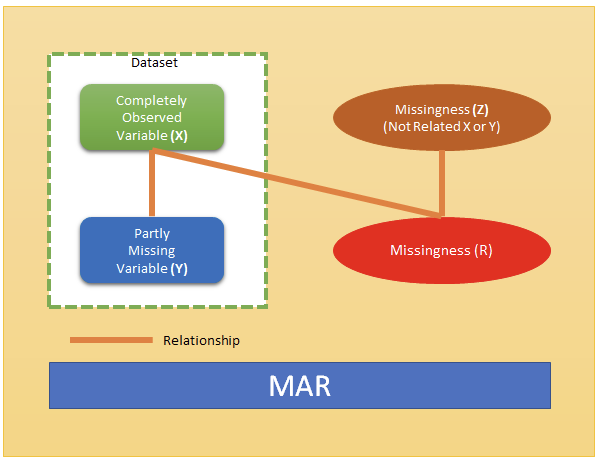

3. Missing Not at Random (MNAR): This is also known as non-ignorable because the missingness mechanism cannot be ignored. They exist when the missing values are neither MCAR or MAR. The missing values on the variable are related to that of both the observed and unobserved variables. <b> <b> Example: You intended not to write or hide your job in the job entry your application. </b><br/> <br/>
    
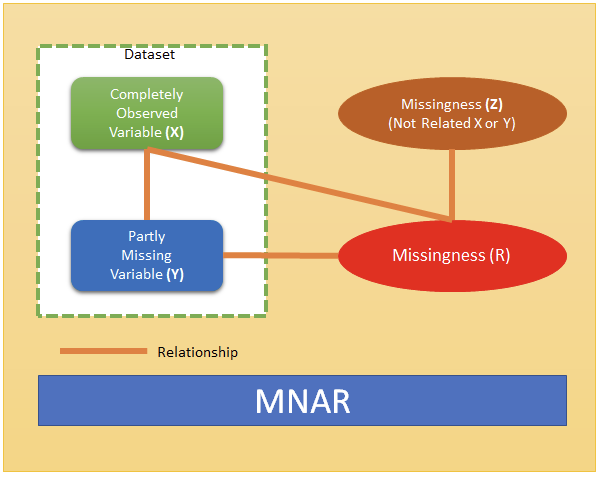

[1]:https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

[2]:https://medium.com/@danberdov/types-of-missing-data-902120fa4248
    



## [Dealing with Missing Values][1]:


1. Dropping Values:
    - Dropping features.
    - Dropping rows.
2. Using Methods:
    - Replace a missing value with mean/mode/specific value.
    - Predictive models for data imputation. Training on complete data and predict missing data in a feature as outcome.
    - Multiple imputation: Use some imputation methods to impute single missing values.
    - Time-Series missing imputation methods:
        - Last Observation Carried Forward: use each value t-1 to impute a vluue t or t+1... if there is no t-1, then backward with the current or latter.
        - Others.



[1]:https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501

# [Let us practice with KNN to impute missing values:][1]


[1]: https://chrisalbon.com/machine_learning/preprocessing_structured_data/imputing_missing_class_labels_using_k-nearest_neighbors/



In [1]:
# Load libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Create feature matrix with categorical feature
X = np.array([[0, 2.10, 1.45], 
              [1, 1.18, 1.33], 
              [0, 1.22, 1.27],
              [1, -0.21, -1.19]])

In [3]:
# Create feature matrix with missing values in the categorical feature
X_with_nan = np.array([[np.nan, 0.87, 1.31], 
                       [np.nan, -0.67, -0.22]])

In [4]:
# Train KNN learner
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

In [5]:
X_with_nan[:,1:]

array([[ 0.87,  1.31],
       [-0.67, -0.22]])

In [6]:
# Predict missing values' class
imputed_values = trained_model.predict(X_with_nan[:,1:])
imputed_values

array([0., 1.])

In [7]:
# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# Join two feature matrices
np.vstack((X_with_imputed, X))

array([[ 0.  ,  0.87,  1.31],
       [ 1.  , -0.67, -0.22],
       [ 0.  ,  2.1 ,  1.45],
       [ 1.  ,  1.18,  1.33],
       [ 0.  ,  1.22,  1.27],
       [ 1.  , -0.21, -1.19]])

# [Using Impyute package][1]:



[1]:https://pypi.org/project/impyute/

# Imputation by means and KNN

In [8]:
# Using Mean with Impute
n = 5
arr = np.random.uniform(high=6, size=(n, n))
for _ in range(3):
    arr[np.random.randint(n), np.random.randint(n)] = np.nan
print(arr)




[[0.56053867 5.94446199 3.55794275 2.71132103 5.20163127]
 [2.78636696        nan 1.88251548 5.48099296 1.49577766]
 [3.91222566 1.97748547 2.68228084 1.22665443 0.89354048]
 [1.32877783 0.44748414 4.57364136 4.40295613 2.07035268]
 [2.68303915 3.32223036        nan 3.13928351        nan]]


In [9]:
import impyute as impy
print(impy.mean(arr))

ModuleNotFoundError: No module named 'impyute'

In [10]:
# Using Weighted KNN or KDTree

data = np.arange(25).reshape((5, 5)).astype(np.float)
data[0][2] =  np.nan
data

/var/folders/g3/6j44vb3s5k90r_h8_4_dhsvw0000gn/T/ipykernel_52250/1857256667.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.arange(25).reshape((5, 5)).astype(np.float)


array([[ 0.,  1., nan,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]])

In [11]:
#KNN
impy.fast_knn(data, k=1)

NameError: name 'impy' is not defined

In [12]:
#KNN
impy.fast_knn(data, k=3)

NameError: name 'impy' is not defined

## Moving Windows

In [ ]:
import impyute as impy

arr=np.array([[-1.24940, -1.38673, -0.03214945, 0.08255145, -0.007415],[ 2.14662, 0.32758 , -0.82601414, 1.78124027, 0.873998], [-0.41400, -0.977629, np.nan, -1.39255344, 1.680435], [ 0.40975, 1.067599, 0.29152388, -1.70160145, -0.565226], [-0.54592, -1.126187, 2.04004377, 0.16664863, -0.010677]])

print(arr)

print()
print(impy.imputation.ts.moving_window(arr,wsize=5))

In [ ]:
(-0.414-0.977629-1.39255344+1.680435)/4

## Last Observation Carried Forward

For each set of missing indices, use the value of one row before(same column). In the case that the missing value is the first row, look one row ahead instead. If this next row is also NaN, look to the next row. Repeat until you find a row in this column that’s not NaN. All the rows before will be filled with this value.

In [ ]:
import impyute as impy

arr=np.array([[-1.24940, -1.38673, -0.03214945, 0.08255145, -0.007415],[ 2.14662, 0.32758 , -0.82601414, 1.78124027, 0.873998], [-0.41400, -0.977629, np.nan, -1.39255344, 1.680435], [ 0.40975, 1.067599, 0.29152388, -1.70160145, -0.565226], [-0.54592, -1.126187, 2.04004377, 0.16664863, -0.010677]])

print(arr)

print()

print(impy.imputation.ts.locf(arr, axis=1))


# Data imbalance

<b> Imbalance </b> means that the number of data points available for different the classes is different <br/>


If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.  


## [Why the imbalanced data is problamatic][1]


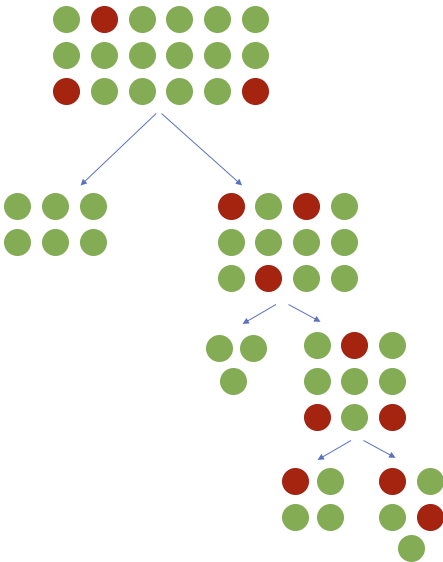

<b> Examples: postive cases in chronic diseases  </b>

[1]:https://www.jeremyjordan.me/imbalanced-data/


# [Dealing with data Imbalance][1]

1. Change the performance metric. <b> Using accuracy is not good at all. Weighted measures are always good. </b> 
2. Change the algorithm.
3. Use a cost function to penaltize the errors from the minority class.
4. [Use Data resampling methods:][2]
   - Oversample minority class.
   - Undersample majority class.
   - Integration of Both resampling methods.
   - In all of the above methods:
        - Randomly data points selections.
        - Algorithmatic data points selections.
        
        
 
 See also: [the link][3] for more steps to deal with Imbalanced data.


[1]: https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
[2]: https://medium.com/james-blogs/handling-imbalanced-data-in-classification-problems-7de598c1059f
[3]:https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

## Resampling methods — Undersample majority class

Undersampling can be defined as removing some data points of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

## Resampling Techniques — Oversample minority class

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

### Important Note:

Always split data before resampling methods and do the methods over the training. 

## [Application of Synthetic Minority Over-sampling Method (SMOTE) for Imbalanced Data-sets][1]


### <b> The idea and algorithm </b>

1. [Idea][2]: Each data point that belongs to the under-represented class, the algorithm gets its K-nearest-neighbors and synthesizes a new instance of the minority label at a random location in the line between the current observation and its nearest neighbor. 

2. [Algorithm][1]:
    - Determine the number of K that you need to search for. If you have a have ratio between majority and minority like 3:1, then you need to have for each minority sample, needs 2 k samples.
    - The difference between the feature vector of the considered instance and the feature vectors of the k nearest neighbours are found. So, k number of difference vectors are obtained.
    - The k difference vectors are each multiplied by a random number between 0 and 1 (excluding 0 and 1).
    - Now, the difference vectors, after being multiplied by random numbers, are added to the feature vector of the considered instance (original minority instance) at each iteration. See the below [figure][3]
    
    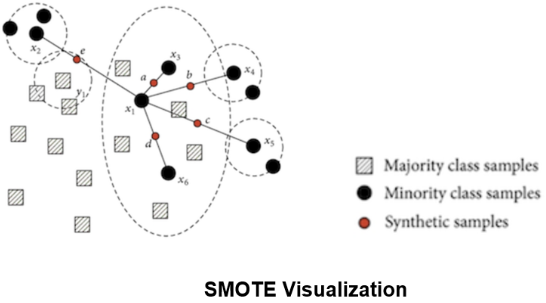

[1]:https://hackernoon.com/application-of-synthetic-minority-over-sampling-technique-smote-for-imbalanced-data-sets-509ab55cfdaf
[2]:https://kite.com/blog/python/smote-python-imbalanced-learn-for-oversampling/
[3]:https://bmi6015.jupyter.med.utah.edu/user/u0852921/notebooks/work/BMI6015-2019-draft/10-28-2019/10-28-2019.ipynb#Missing-Data-Mechanism


# [Example from the SMOTE paper][1]


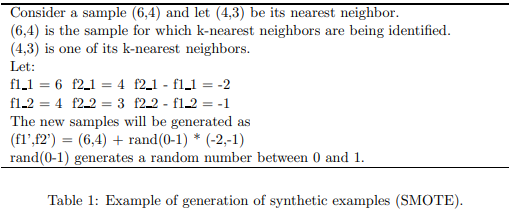


[1]:https://arxiv.org/pdf/1106.1813.pdf

# [Using imblearn package][1]

[1]:https://imbalanced-learn.org/stable/

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
